In [1]:
# Show
# Change Runtime to GPU
# Adapted from https://colab.research.google.com/github/fastai/fastbook/blob/master/01_intro.ipynb

In [2]:
# Slow. 
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
#hide
from fastbook import *

In [ ]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.180385,0.023942,0.006766,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.056023,0.007580,0.004060,00:20


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.641862,2.140568,00:02


epoch,train_loss,valid_loss,time
0,1.624964,1.464210,00:02
1,1.454148,1.284032,00:02
2,1.342955,1.048562,00:02
3,1.199765,0.852787,00:02
4,1.078090,0.838206,00:02
5,0.975496,0.746806,00:02
6,0.892793,0.725384,00:02
7,0.827645,0.726778,00:02


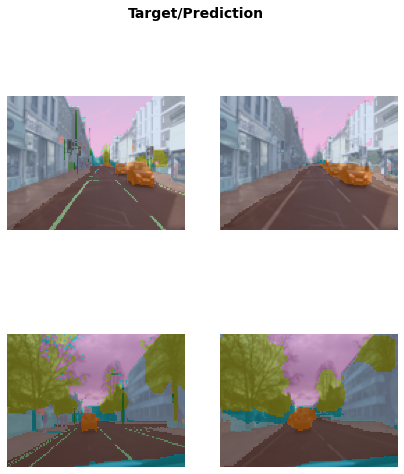

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.878776,0.748753,0.500400,01:27


epoch,train_loss,valid_loss,accuracy,time
0,0.679118,0.674778,0.584040,02:45
1,0.653671,0.670396,0.618040,02:55
2,0.598665,0.551815,0.718920,05:28
3,0.556812,0.507450,0.752480,03:11


In [ ]:
learn.predict("I really liked that movie!")

('neg', tensor(0), tensor([0.8786, 0.1214]))

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.372397,0.357177,0.832463,00:08
1,0.351544,0.341505,0.841523,00:08
2,0.338763,0.339184,0.845670,00:08


In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510897,1.410028,00:00


epoch,train_loss,valid_loss,time
0,1.375435,1.350930,00:00
1,1.270062,1.173962,00:00
2,1.023159,0.879298,00:00
3,0.797398,0.739787,00:00
4,0.685500,0.700903,00:00
5,0.646508,0.686387,00:00
6,0.623985,0.681087,00:00
7,0.606319,0.676885,00:00
8,0.606975,0.675833,00:00
9,0.602670,0.675682,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,66.0,79.0,4.0,3.978900
1,97.0,15.0,4.0,3.851795
2,55.0,79.0,3.5,3.945623
3,98.0,91.0,4.0,4.458704
4,53.0,7.0,5.0,4.670005
5,26.0,69.0,5.0,4.319870
6,81.0,16.0,4.5,4.426761
7,80.0,7.0,4.0,4.046183
8,51.0,94.0,5.0,3.499996
